# Sentiment Analysis in Python

In this notebook we will be doing some sentiment analysis in python using two different techniques:
1. VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
2. Roberta Pretrained Model from 🤗
3. TextBlob

# Read in Data and NLTK Basics

In [236]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [237]:
# Read in data
df = pd.read_csv('comments.csv').sample(1000).reset_index()
print(df.shape)

(1000, 12)


In [238]:
df.head()

,index,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,205,171023,171024,B001BM395E,A21M64E9JHKVH2,yovnne,0,0,5,1331510400,Gift,It's gift for my princess.It tastes good and ...
1,1311,471616,471617,B000OCQ6DY,A4CK9P7R1NYGG,R. W. Tolles,0,2,3,1335052800,So far so good,It is to early for me to give it more than thr...
2,396,362010,362011,B006N3HZ6K,A35YDDY2PKVB12,"P. Lyons ""Dark Roast Coffee Guy""",0,0,5,1274227200,"Dark, Rich and Fairly Strong",I'm a Dark Roast kinda guy and Jet Fuel is pre...
3,1872,314185,314186,B002EDIJX6,A1Q5MOM83O5GXW,"K. Liang ""Da Review Killa""",2,2,5,1308787200,Can't get enough of this!!!,"I do not usually eat sweets, as I find most Am..."
4,2410,9122,9123,B006N3IG4K,A7JCNKDASI7R0,J. Epps,0,0,4,1331424000,Pretty good coffee,This is a smooth not bitter coffee. It's a lit...


In [239]:
df[['Text']].sample(10)

,Text
571,Sumatra coffee beans have been my favorite for...
887,Izze's All-Natural Sparkling Pomegranate Juice...
696,My dog has food allergies. She is not supposed...
642,I was looking for something that would hold a ...
660,My local gourmet grocery USED to carry this pr...
229,PILON coffee as my first purchase on AMAZON. T...
564,For those of you who like flavored coffee and ...
128,"Canela is Spanish for ""cinnamon""-so this new S..."
716,If you're looking for an excellent healthy sna...
309,I first read about these bars in a magazine ar...


## EDA

In [240]:
import plotly.express as px
fig = px.histogram(df, x="Score")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


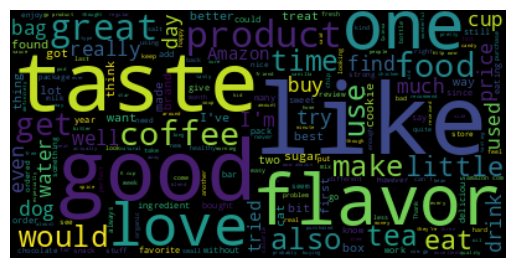

In [241]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load stopwords
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])

# Concatenate all text from the 'Text' column
text = " ".join(review for review in df['Text'])

# Generate word cloud
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

## Basic NLTK

In [242]:
example = df['Text'][50]
print(example)

usually saladitos are salted prunes apricots have a little different flavor but they are still good recieved them very quick good supplier


In [243]:
#pour colab
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [244]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['usually',
 'saladitos',
 'are',
 'salted',
 'prunes',
 'apricots',
 'have',
 'a',
 'little',
 'different']

In [245]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('usually', 'RB'),
 ('saladitos', 'NNS'),
 ('are', 'VBP'),
 ('salted', 'VBN'),
 ('prunes', 'NNS'),
 ('apricots', 'NNS'),
 ('have', 'VBP'),
 ('a', 'DT'),
 ('little', 'JJ'),
 ('different', 'JJ')]

In [246]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [247]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [248]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  usually/RB
  saladitos/NNS
  are/VBP
  salted/VBN
  prunes/NNS
  apricots/NNS
  have/VBP
  a/DT
  little/JJ
  different/JJ
  flavor/NN
  but/CC
  they/PRP
  are/VBP
  still/RB
  good/JJ
  recieved/VBD
  them/PRP
  very/RB
  quick/RB
  good/JJ
  supplier/NN)


# VADER Seniment Scoring

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a rule-based sentiment analyzer that has been trained on social media text. Just like Text Blob, its usage in Python is pretty simple. We’ll see its usage in code implementation with an example in a while

We will use NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

- This uses a "bag of words" approach:
    1. Stop words are removed
    2. each word is scored and combined to a total score.

In [249]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [250]:
sia.polarity_scores("I don't love sentiment analysis!")

{'neg': 0.55, 'neu': 0.45, 'pos': 0.0, 'compound': -0.5661}

In [251]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [252]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'compound': 0.8271}

In [253]:
df.head()

,index,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,205,171023,171024,B001BM395E,A21M64E9JHKVH2,yovnne,0,0,5,1331510400,Gift,It's gift for my princess.It tastes good and ...
1,1311,471616,471617,B000OCQ6DY,A4CK9P7R1NYGG,R. W. Tolles,0,2,3,1335052800,So far so good,It is to early for me to give it more than thr...
2,396,362010,362011,B006N3HZ6K,A35YDDY2PKVB12,"P. Lyons ""Dark Roast Coffee Guy""",0,0,5,1274227200,"Dark, Rich and Fairly Strong",I'm a Dark Roast kinda guy and Jet Fuel is pre...
3,1872,314185,314186,B002EDIJX6,A1Q5MOM83O5GXW,"K. Liang ""Da Review Killa""",2,2,5,1308787200,Can't get enough of this!!!,"I do not usually eat sweets, as I find most Am..."
4,2410,9122,9123,B006N3IG4K,A7JCNKDASI7R0,J. Epps,0,0,4,1331424000,Pretty good coffee,This is a smooth not bitter coffee. It's a lit...


In [254]:
df.columns

Index(['index', 'Unnamed: 0', 'Id', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

In [255]:
sentiment_scores = df['Text'].apply(lambda x: sia.polarity_scores(x))

In [256]:
df1 = pd.concat([df, sentiment_scores.apply(pd.Series)], axis=1)

In [257]:
df1

,index,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,205,171023,171024,B001BM395E,A21M64E9JHKVH2,yovnne,0,0,5,1331510400,Gift,It's gift for my princess.It tastes good and ...,0.000,0.500,0.500,0.9324
1,1311,471616,471617,B000OCQ6DY,A4CK9P7R1NYGG,R. W. Tolles,0,2,3,1335052800,So far so good,It is to early for me to give it more than thr...,0.000,0.779,0.221,0.8431
2,396,362010,362011,B006N3HZ6K,A35YDDY2PKVB12,"P. Lyons ""Dark Roast Coffee Guy""",0,0,5,1274227200,"Dark, Rich and Fairly Strong",I'm a Dark Roast kinda guy and Jet Fuel is pre...,0.000,0.650,0.350,0.9389
3,1872,314185,314186,B002EDIJX6,A1Q5MOM83O5GXW,"K. Liang ""Da Review Killa""",2,2,5,1308787200,Can't get enough of this!!!,"I do not usually eat sweets, as I find most Am...",0.041,0.741,0.218,0.9885
4,2410,9122,9123,B006N3IG4K,A7JCNKDASI7R0,J. Epps,0,0,4,1331424000,Pretty good coffee,This is a smooth not bitter coffee. It's a lit...,0.000,0.599,0.401,0.9289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1930,296806,296807,B004M14HWA,A3MBDM1YTB0VDI,Jennifer,0,0,5,1292284800,Thank goodness for ready-to-feed,Similac sensative agrees with my baby 100% and...,0.047,0.890,0.063,0.1739
996,45,298588,298589,B006N3I0DM,AKX0GK73F2XVE,SUNNY SYL,2,2,5,1343001600,delicious tasting kcup,Love the rich flavor and good taste. Strong b...,0.051,0.434,0.515,0.9700
997,304,482447,482448,B001ELJKCS,A3LR6LTFY8AWFR,"N. Simonis ""Tech Junkie""",0,0,2,1347321600,Still Learning...,"I had high hopes for this wine kit, but after ...",0.000,0.813,0.187,0.9568
998,726,459985,459986,B000Y4S38I,A1LTDEUQUFK1WC,C. Goettel,0,0,5,1326067200,This gum is amazing!,There is such a great cinnamon flavor to this ...,0.030,0.721,0.249,0.9440


In [258]:
'''res={}
for i,text in zip(df['Id'],df['Text']):
    res[i] = sia.polarity_scores(text)'''

"res={}\nfor i,text in zip(df['Id'],df['Text']):\n    res[i] = sia.polarity_scores(text)"

In [259]:
#res

In [260]:
'''vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')'''

"vaders = pd.DataFrame(res).T\nvaders = vaders.reset_index().rename(columns={'index': 'Id'})\nvaders = vaders.merge(df, how='left')"

In [261]:
'''# Now we have sentiment score and metadata
vaders.head()'''

'# Now we have sentiment score and metadata\nvaders.head()'

## Plot VADER results

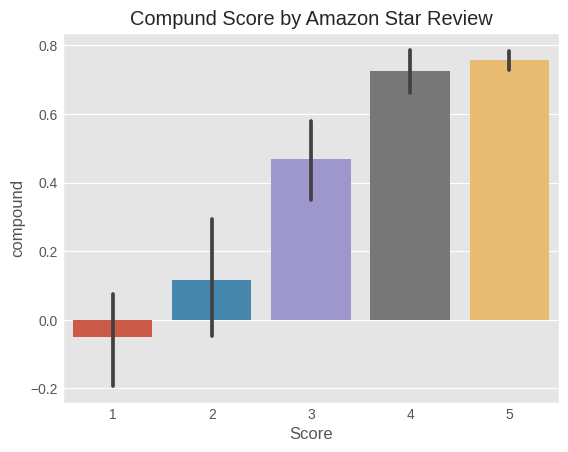

In [262]:
ax = sns.barplot(data=df1, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

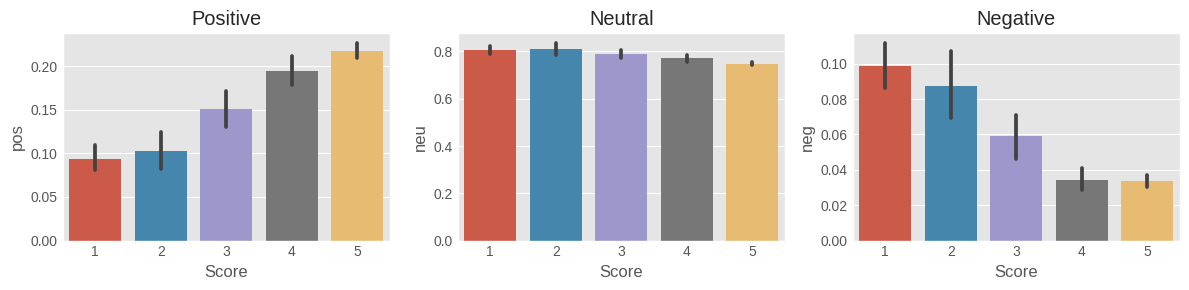

In [263]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=df1, x='Score', y='pos', ax=axs[0])
sns.barplot(data=df1, x='Score', y='neu', ax=axs[1])
sns.barplot(data=df1, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# TextBlob for sentiment analysis 

In [264]:
#pour colab 
!pip install spacytextblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [265]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from textblob import TextBlob

In [266]:
df2=df

In [267]:
# Analyze sentiments for each text
sentiments = []

for texte in df2['Text']:
    blob = TextBlob(texte)
    sentiment = blob.sentiment.polarity
    sentiments.append(sentiment)

df2['sentiment'] = sentiments


In [268]:
df2.columns

Index(['index', 'Unnamed: 0', 'Id', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text', 'sentiment'],
      dtype='object')

In [269]:
df2=df2[df2.Score==5]

In [270]:
df2.head()

,index,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,205,171023,171024,B001BM395E,A21M64E9JHKVH2,yovnne,0,0,5,1331510400,Gift,It's gift for my princess.It tastes good and ...,0.392500
2,396,362010,362011,B006N3HZ6K,A35YDDY2PKVB12,"P. Lyons ""Dark Roast Coffee Guy""",0,0,5,1274227200,"Dark, Rich and Fairly Strong",I'm a Dark Roast kinda guy and Jet Fuel is pre...,0.520000
3,1872,314185,314186,B002EDIJX6,A1Q5MOM83O5GXW,"K. Liang ""Da Review Killa""",2,2,5,1308787200,Can't get enough of this!!!,"I do not usually eat sweets, as I find most Am...",0.240188
5,1928,207312,207313,B003D4IYSU,A3JS4HZHL8SXNZ,Banana Incident,0,0,5,1330560000,One of my favorites,I was first introduced to this delicious tea i...,0.213810
7,170,455816,455817,B000CR1ELU,A1Z28YTETSMLQ,Sue Stewart,0,0,5,1230681600,vanilla beans,I've purchased beans from Penzy's and Spice Ho...,0.400000


In [271]:
df2.columns

Index(['index', 'Unnamed: 0', 'Id', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text', 'sentiment'],
      dtype='object')

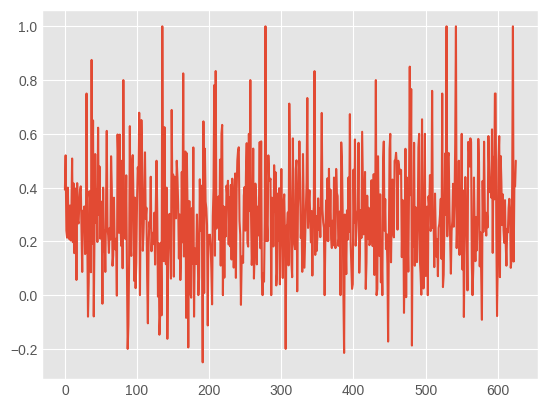

In [272]:
plt.plot(range(len(df2)),df2.sentiment,label='TextBlob')
plt.show()

In [273]:
df.reset_index
df

,index,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,205,171023,171024,B001BM395E,A21M64E9JHKVH2,yovnne,0,0,5,1331510400,Gift,It's gift for my princess.It tastes good and ...,0.392500
1,1311,471616,471617,B000OCQ6DY,A4CK9P7R1NYGG,R. W. Tolles,0,2,3,1335052800,So far so good,It is to early for me to give it more than thr...,0.280000
2,396,362010,362011,B006N3HZ6K,A35YDDY2PKVB12,"P. Lyons ""Dark Roast Coffee Guy""",0,0,5,1274227200,"Dark, Rich and Fairly Strong",I'm a Dark Roast kinda guy and Jet Fuel is pre...,0.520000
3,1872,314185,314186,B002EDIJX6,A1Q5MOM83O5GXW,"K. Liang ""Da Review Killa""",2,2,5,1308787200,Can't get enough of this!!!,"I do not usually eat sweets, as I find most Am...",0.240188
4,2410,9122,9123,B006N3IG4K,A7JCNKDASI7R0,J. Epps,0,0,4,1331424000,Pretty good coffee,This is a smooth not bitter coffee. It's a lit...,0.358929
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1930,296806,296807,B004M14HWA,A3MBDM1YTB0VDI,Jennifer,0,0,5,1292284800,Thank goodness for ready-to-feed,Similac sensative agrees with my baby 100% and...,0.125000
996,45,298588,298589,B006N3I0DM,AKX0GK73F2XVE,SUNNY SYL,2,2,5,1343001600,delicious tasting kcup,Love the rich flavor and good taste. Strong b...,0.409722
997,304,482447,482448,B001ELJKCS,A3LR6LTFY8AWFR,"N. Simonis ""Tech Junkie""",0,0,2,1347321600,Still Learning...,"I had high hopes for this wine kit, but after ...",0.101250
998,726,459985,459986,B000Y4S38I,A1LTDEUQUFK1WC,C. Goettel,0,0,5,1326067200,This gum is amazing!,There is such a great cinnamon flavor to this ...,0.404762


In [274]:
sentiments_neg=[]

df_negtext=df[df['Score']==1]

for texte in df_negtext['Text'] :
      blob = TextBlob(texte)
      sentiment = blob.sentiment.polarity
      sentiments_neg.append(sentiment)

# Roberta Pretrained Model

- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

In [275]:
df3=df

In [276]:
#pour colab
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [277]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [278]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [279]:
# VADER results on example
print(example)
sia.polarity_scores(example)

usually saladitos are salted prunes apricots have a little different flavor but they are still good recieved them very quick good supplier


{'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'compound': 0.8271}

In [280]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0027435562, 'roberta_neu': 0.03896965, 'roberta_pos': 0.9582868}


In [281]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [282]:
res = {}
for i, row in tqdm(df3.iterrows(), total=len(df3)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 133337
Broke for id 216365
Broke for id 470892
Broke for id 504935
Broke for id 562682
Broke for id 461789
Broke for id 509238
Broke for id 228959
Broke for id 272285
Broke for id 199334
Broke for id 89577


In [283]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df3, how='left')

## Compare Scores between models

In [284]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'index', 'Unnamed: 0',
       'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'sentiment'],
      dtype='object')

# Step 3. Combine and compare

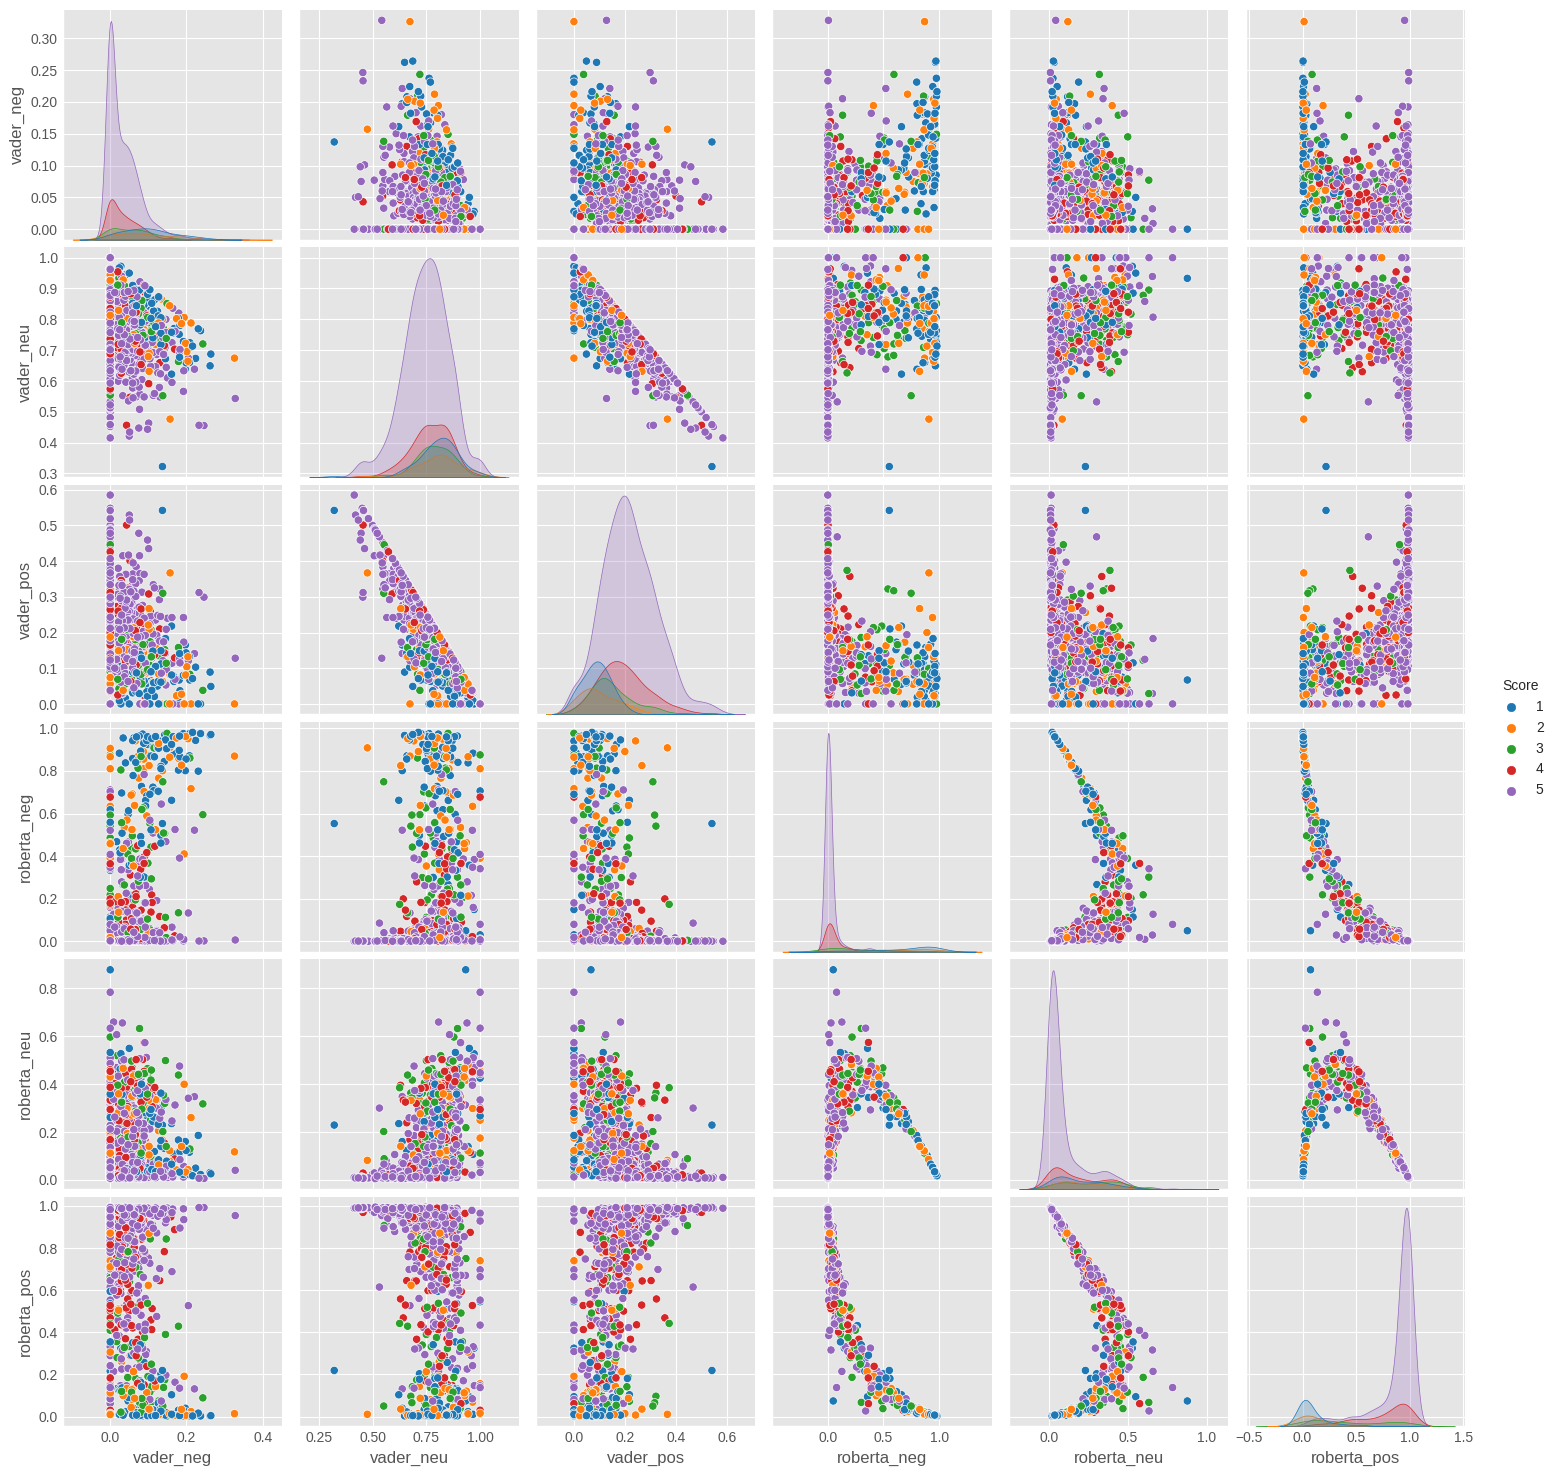

In [285]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

# Step 4: Review Examples:

- Positive 1-Star and Negative 5-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

In [286]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

"My 10-month old loves these! They are helpful to teach him how to eat and relieve pain from teething, too. Look around for a better price: I was able to find a great deal at my local BJ's club: a mixed 6-pack for $9.99. At the supermarket, they are $2/can.<br /><br />Whenever we go out and run errands, I make a snack container for him. I mix a bunch of different snacks together and let him choose what he wants when fussiness ensues. He always chooses these or the Dr. Sears yogurt melts."

In [287]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'I love coffee, I love mochas, I love amaretto.<br />This product however was disgusting !!!'

In [288]:
# nevative sentiment 5-Star view

In [289]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'Those that say these peppers are not hot must eat this stuff a lot, or just have no sense of heat. Everyone I let try these have said these peppers are crazy hot. I would not eat them straight out of the package because they can get stuck to the back of your thought and cause some trouble.'

In [290]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'Kids love them.  They taste close to regular gumballs but no worry about teeth.'

In [291]:
results_df

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,index,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,171024,0.000,0.500,0.500,0.9324,0.001698,0.023296,0.975005,205,171023,B001BM395E,A21M64E9JHKVH2,yovnne,0,0,5,1331510400,Gift,It's gift for my princess.It tastes good and ...,0.392500
1,471617,0.000,0.779,0.221,0.8431,0.002422,0.033520,0.964058,1311,471616,B000OCQ6DY,A4CK9P7R1NYGG,R. W. Tolles,0,2,3,1335052800,So far so good,It is to early for me to give it more than thr...,0.280000
2,362011,0.000,0.650,0.350,0.9389,0.002123,0.006678,0.991199,396,362010,B006N3HZ6K,A35YDDY2PKVB12,"P. Lyons ""Dark Roast Coffee Guy""",0,0,5,1274227200,"Dark, Rich and Fairly Strong",I'm a Dark Roast kinda guy and Jet Fuel is pre...,0.520000
3,314186,0.041,0.741,0.218,0.9885,0.020900,0.057560,0.921541,1872,314185,B002EDIJX6,A1Q5MOM83O5GXW,"K. Liang ""Da Review Killa""",2,2,5,1308787200,Can't get enough of this!!!,"I do not usually eat sweets, as I find most Am...",0.240188
4,9123,0.000,0.599,0.401,0.9289,0.002901,0.034190,0.962908,2410,9122,B006N3IG4K,A7JCNKDASI7R0,J. Epps,0,0,4,1331424000,Pretty good coffee,This is a smooth not bitter coffee. It's a lit...,0.358929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,296807,0.047,0.890,0.063,0.1739,0.007867,0.146295,0.845838,1930,296806,B004M14HWA,A3MBDM1YTB0VDI,Jennifer,0,0,5,1292284800,Thank goodness for ready-to-feed,Similac sensative agrees with my baby 100% and...,0.125000
985,298589,0.051,0.434,0.515,0.9700,0.001811,0.008269,0.989920,45,298588,B006N3I0DM,AKX0GK73F2XVE,SUNNY SYL,2,2,5,1343001600,delicious tasting kcup,Love the rich flavor and good taste. Strong b...,0.409722
986,482448,0.000,0.813,0.187,0.9568,0.018517,0.111495,0.869988,304,482447,B001ELJKCS,A3LR6LTFY8AWFR,"N. Simonis ""Tech Junkie""",0,0,2,1347321600,Still Learning...,"I had high hopes for this wine kit, but after ...",0.101250
987,459986,0.030,0.721,0.249,0.9440,0.001441,0.011847,0.986712,726,459985,B000Y4S38I,A1LTDEUQUFK1WC,C. Goettel,0,0,5,1326067200,This gum is amazing!,There is such a great cinnamon flavor to this ...,0.404762


In [292]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'index', 'Unnamed: 0',
       'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'sentiment'],
      dtype='object')

In [293]:
df_pos=results_df[results_df.Score==5]
df_pos=df_pos.reset_index()

In [294]:
df_pos.columns

Index(['level_0', 'Id', 'vader_neg', 'vader_neu', 'vader_pos',
       'vader_compound', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'index',
       'Unnamed: 0', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text', 'sentiment'],
      dtype='object')

<ipython-input-295-4f21ae5cddee>:4: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



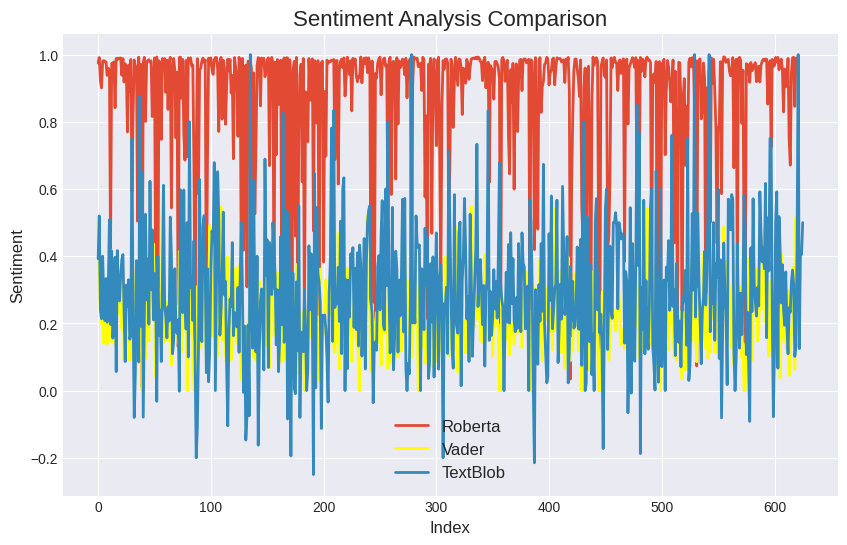

In [295]:
import matplotlib.pyplot as plt

# Set the style of the plot
plt.style.use('seaborn-darkgrid')

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the sentiment analysis results for Roberta
ax.plot(df_pos.index, df_pos['roberta_pos'], label='Roberta', linewidth=2)

# Plot the sentiment analysis results for Vader
ax.plot(df_pos.index, df_pos.vader_pos, label='Vader', linewidth=2,c='yellow')

# Plot the sentiment analysis results for TextBlob
ax.plot(range(len(df2)), df2['sentiment'], label='TextBlob', linewidth=2)

# Set the title and axis labels
ax.set_title('Sentiment Analysis Comparison', fontsize=16)
ax.set_xlabel('Index', fontsize=12)
ax.set_ylabel('Sentiment', fontsize=12)

# Add a legend
ax.legend(fontsize=12)

# Adjust the tick labels size
ax.tick_params(axis='both', labelsize=10)

# Display the plot
plt.show()


In [296]:
df_neg=results_df[results_df.Score==1]
df_neg=df_neg.reset_index()

In [297]:
df_neg

,level_0,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,index,...,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,7,476205,0.000,1.000,0.000,0.0000,0.031094,0.424187,0.544720,119,...,B0006NLXKM,A4FUCQSNOH2LJ,Ron Russell,3,4,1,1269907200,Red Barn Dog Food 4 lb rolls,The price on these rolls is double the normal ...,0.117188
1,15,88121,0.056,0.837,0.108,0.8070,0.057913,0.154136,0.787951,2367,...,B0030VBQOK,A1P6DDF41GJ8UN,"Kelly Cannon ""henry'smama""",2,7,1,1291852800,price is way too high!,The price from 911drugstore is crazy! If you ...,0.178175
2,33,307444,0.085,0.849,0.066,-0.5994,0.946122,0.047374,0.006504,1888,...,B001D0IZ4O,A17SKMAS0YYBV,Bonnie L.,0,0,1,1319760000,Not same taste as packets,The packets of white hot chocolate powder mix ...,-0.142593
3,45,191202,0.040,0.944,0.016,-0.3865,0.837377,0.139276,0.023347,782,...,B004OUX2RU,A30Y0WZDVJEAJ,mel,0,0,1,1344816000,Not white and too soft,"This fondant is not white, which defeated the ...",-0.122222
4,57,405628,0.082,0.800,0.117,0.4230,0.727080,0.219401,0.053519,291,...,B005K4Q4LK,A3ISWM9TH5X7IZ,wendelus,1,2,1,1328140800,INSTANT COFFEE!,I bought this for my daughter and she was very...,0.034105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,915,266799,0.264,0.687,0.049,-0.9543,0.970421,0.025347,0.004232,334,...,B000ETGBN2,A3H07Y4ETX67WN,rustafari812,0,1,1,1290556800,Don't ever buy this product,These cookies were AWFUL! Really bad. My co-...,-0.176190
88,930,146341,0.119,0.776,0.105,-0.3542,0.961013,0.034190,0.004797,1668,...,B0000DID5R,A3DNAMI63Q1RSW,"Andrew Abels ""AAA""",1,21,1,1302480000,This stuff is not food.,I put 2 drops into 3 scrambled eggs and mixed ...,0.261667
89,939,166670,0.082,0.790,0.128,0.6443,0.459944,0.399063,0.140993,11,...,B004F27F5C,A1Z82P1BZWOJ38,maevictoria,3,23,1,1325808000,90. for two glass jars and some tea. no thanks.,it's so unique getting the scoby that it's not...,0.218750
90,966,13762,0.069,0.844,0.087,-0.3493,0.959164,0.033950,0.006887,1687,...,B0024VCX6M,A1ZQWQ4SE49YXO,A. Newman,2,4,1,1306540800,Not My Taste Preference,I ordered these without having tried them befo...,-0.151515


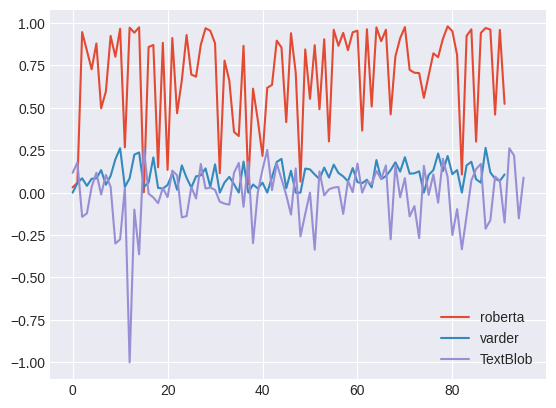

In [298]:
plt.plot(df_neg.index,df_neg.roberta_neg,label='roberta')
plt.plot(df_neg.index,df_neg.vader_neg,label='varder')
plt.plot(range(len(sentiments_neg)),sentiments_neg,label='TextBlob')
plt.legend()
plt.show()

# Extra : Classifying Reviews

In [304]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
df = df[df['Score'] != 3]
df['sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else -1)

<ipython-input-304-1d066d67b1fd>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [305]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

## Wordcloud — Positive Sentiment

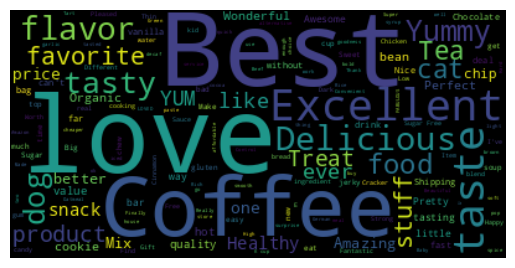

In [306]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create stopwords set
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href", "good", "great"])

# Concatenate positive summaries
pos = " ".join(review for review in positive.Summary)

# Generate word cloud
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)

# Display the word cloud
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

## Wordcloud — Negative Sentiment

In [ ]:
negative['Summary']=negative['Summary'].astype('str')

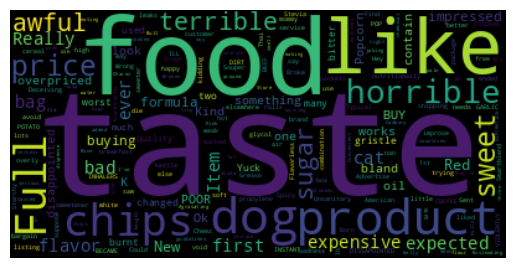

In [312]:
neg = " ".join(review for review in negative.Summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [ ]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [ ]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['Text'] = df['Text'].apply(remove_punctuation)
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(remove_punctuation)

In [315]:
dfNew = df[['Summary','sentiment']]
dfNew.head()

,Summary,sentiment
0,Gift,1
2,"Dark, Rich and Fairly Strong",1
3,Can't get enough of this,1
4,Pretty good coffee,1
5,One of my favorites,1


In [316]:
# random split train and test data
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [317]:
#bag of words
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary'])

In [318]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [319]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [320]:
lr.fit(X_train,y_train)

LogisticRegression()

In [321]:
predictions = lr.predict(X_test)

In [322]:
# Testing
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[  4,   7],
       [ 18, 171]])

In [323]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.18      0.36      0.24        11
           1       0.96      0.90      0.93       189

    accuracy                           0.88       200
   macro avg       0.57      0.63      0.59       200
weighted avg       0.92      0.88      0.89       200



## THE END